In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data = pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data=data.rename(columns={'Delivery Time': 'dt','Sorting Time': 'st' })
data

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
data.isnull().sum()

dt    0
st    0
dtype: int64

In [7]:
data.dt.mean()

16.79095238095238

In [8]:
data.st.mean()

6.190476190476191

In [9]:
data.dt.median()

17.83

In [10]:
data.st.median()

6.0

In [11]:
data.dt.mode()

0      8.00
1      9.50
2     10.75
3     11.50
4     12.03
5     13.50
6     13.75
7     14.88
8     15.35
9     16.68
10    17.83
11    17.90
12    18.11
13    18.75
14    19.00
15    19.75
16    19.83
17    21.00
18    21.50
19    24.00
20    29.00
dtype: float64

In [12]:
data.st.mode()

0    7
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dt      21 non-null     float64
 1   st      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\nitish kale\anaconda3\anacondank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dt', ylabel='Density'>

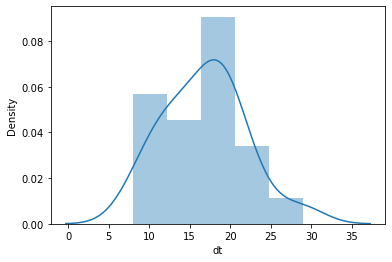

In [23]:
sns.distplot(data['dt'])


C:\Users\nitish kale\anaconda3\anacondank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='st', ylabel='Density'>

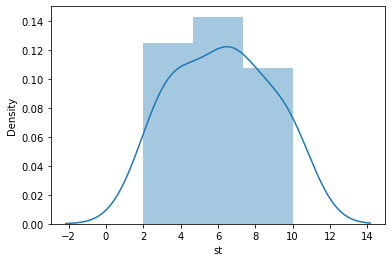

In [24]:
sns.distplot(data['st'])

In [14]:
data.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


Text(0.5, 0, 'Sorting time')

Text(0, 0.5, 'Delivery time')

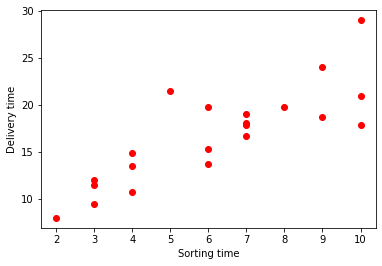

In [15]:
plt.scatter(x=data.st, y=data.dt, color='red')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

{'whiskers': [<matplotlib.lines.Line2D at 0x2da8a29ba90>,
 'caps': [<matplotlib.lines.Line2D at 0x2da8a2ab130>,
 'boxes': [<matplotlib.lines.Line2D at 0x2da8a29b640>],
 'medians': [<matplotlib.lines.Line2D at 0x2da8a2ab850>],
 'fliers': [<matplotlib.lines.Line2D at 0x2da8a2abbe0>],
 'means': []}

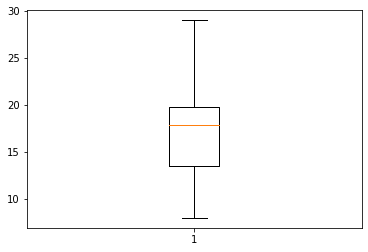

In [16]:
plt.boxplot(data.dt)

(array([5., 4., 8., 3., 1.]),
 array([ 8. , 12.2, 16.4, 20.6, 24.8, 29. ]),
 <BarContainer object of 5 artists>)

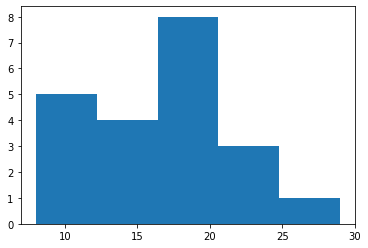

In [17]:
plt.hist(data.dt, bins=5)

<AxesSubplot:xlabel='st', ylabel='dt'>

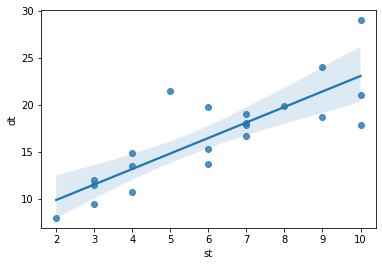

In [18]:
sns.regplot(x=data['st'],y=data['dt'])

In [19]:
model=smf.ols("dt~st",data=data).fit()

In [20]:
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [25]:
model.tvalues , model.pvalues


(Intercept    3.823349
 st           6.387447
 dtype: float64,
 Intercept    0.001147
 st           0.000004
 dtype: float64)

In [26]:
model.rsquared , model.rsquared_adj


(0.6822714748417231, 0.6655489208860244)

In [27]:
dt= (6.582734) + (1.649020)*(5)
dt


14.827834

In [28]:
new_data=pd.Series([5,8])
new_data


0    5
1    8
dtype: int64

In [29]:
data_pred=pd.DataFrame(new_data,columns=['st'])
data_pred


,st
0,5
1,8


In [30]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64